# Python Lab Exercise #2

## Objectives:

- Load .csv files into `pandas` DataFrames
- Describe and manipulate data in Series and DataFrames
- Visualize data using DataFrame methods and `matplotlib`

![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## What is Pandas?

Pandas, as [the Anaconda docs](https://docs.anaconda.com/anaconda/packages/py3.7_osx-64/) tell us, offers us "High-performance, easy-to-use data structures and data analysis tools." It's something like "Excel for Python", but it's quite a bit more powerful.

Let's read in the heart dataset.

Pandas has many methods for reading different types of files. Note that here we have a db file for this exercise.

Read about this dataset [here](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data).

In [53]:
#Dependencies and setup
import pandas as pd
import numpy as np
import sqlite3
import os

current_directory = os.getcwd()
print(current_directory)

# loading the data from the database python.db
con = sqlite3.connect(r'./data/python.db')

pd.read_sql('SELECT * FROM school', con)



/Users/jayhawkj/Desktop/Git_Repo/DS311-Technologies-in-Data-Analytic-SP25/Week_04_Pandas_and_Matplotlib/Lab_Assignment


,id,School ID,school_name,type,size,budget
0,0,0,Huang High School,District,2917,1910635
1,1,1,Figueroa High School,District,2949,1884411
2,2,2,Shelton High School,Charter,1761,1056600
3,3,3,Hernandez High School,District,4635,3022020
4,4,4,Griffin High School,Charter,1468,917500
5,5,5,Wilson High School,Charter,2283,1319574
6,6,6,Cabrera High School,Charter,1858,1081356
7,7,7,Bailey High School,District,4976,3124928
8,8,8,Holden High School,Charter,427,248087
9,9,9,Pena High School,Charter,962,585858


The output of the `.to_sql()` function is a pandas *DataFrame*, which has a familiar tabaular structure of rows and columns.

In [56]:
heart_df = pd.read_sql("SELECT * FROM heart", con)
type(heart_df)

pandas.core.frame.DataFrame

## DataFrames and Series

Two main types of pandas objects are the DataFrame and the Series, the latter being in effect a single column of the former:

In [57]:
age_series = heart_df['age']
type(age_series)

pandas.core.series.Series

Notice how we can isolate a column of our DataFrame simply by using square brackets together with the name of the column.

Both Series and DataFrames have an *index* as well:

In [58]:
heart_df.index

RangeIndex(start=0, stop=303, step=1)

In [59]:
age_series.index

RangeIndex(start=0, stop=303, step=1)

Pandas is built on top of NumPy, and we can always access the NumPy array underlying a DataFrame using `.values`.

In [60]:
heart_df.values

array([[  0.,  63.,   1., ...,   0.,   1.,   1.],
       [  1.,  37.,   1., ...,   0.,   2.,   1.],
       [  2.,  41.,   0., ...,   0.,   2.,   1.],
       ...,
       [300.,  68.,   1., ...,   2.,   3.,   0.],
       [301.,  57.,   1., ...,   1.,   3.,   0.],
       [302.,  57.,   0., ...,   1.,   2.,   0.]])

## Basic DataFrame Attributes and Methods

### `.head()`

In [61]:
# complete the python code here

# Show the first 5 rows of the heart_df DataFrame
heart_df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### `.tail()`

In [62]:
# complete the python code here

# Show the last 5 rows of the heart_df DataFrame
heart_df.tail()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### `.info()`

In [63]:
# complete the python code here

# Display information about the heart_df DataFrame
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
 12  ca        303 non-null    int64  
 13  thal      303 non-null    int64  
 14  target    303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


### `.describe()`

In [65]:
# complete the python code here

# Display summary statistics for numeric columns in heart_df
# Statistics for all columns (including non-numeric)
heart_df.describe(include="all")

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,87.612784,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,151.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,226.500000,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### `.dtypes`

In [66]:
# complete the python code here

# Display the data types for each column in heart_df
heart_df.dtypes


id            int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### `.shape`

In [67]:
# complete the python code here

# Display the number of rows and columns in heart_df
print("Shape of heart_df:", heart_df.shape)

Shape of heart_df: (303, 15)


### Exploratory Plots

Let's make ourselves a histogram of ages:

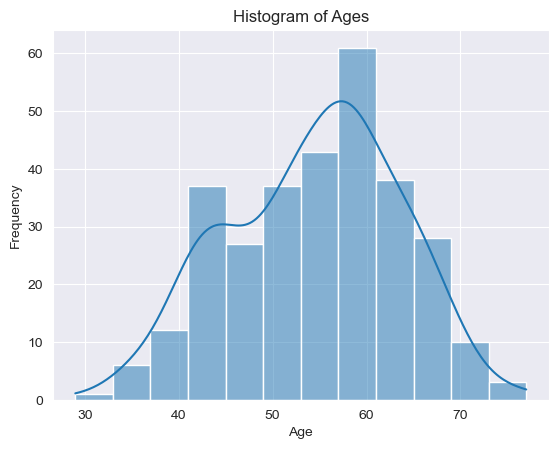

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

# Using histplot (axes-level)
sns.histplot(data=heart_df, x="age", kde=True)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Ages")
plt.show()

# For more recent versions of seaborn:
# sns.histplot(data=heart_df['age'], kde=True);

And while we're at it let's do a scatter plot of maximum heart rate vs. age:

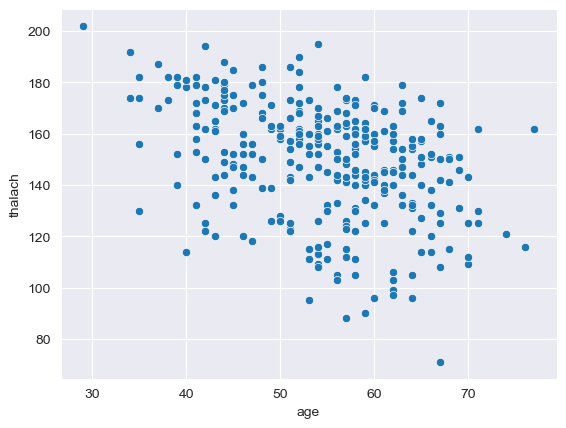

In [70]:
sns.scatterplot(x=heart_df['age'], y=heart_df['thalach']);

## Adding to a DataFrame

### Adding Rows

Here are two rows that our engineer accidentally left out of the .csv file, expressed as a Python dictionary:

In [71]:
extra_rows = {'age': [40, 30], 
              'sex': [1, 0], 
              'cp': [0, 0], 
              'trestbps': [120, 130],
              'chol': [240, 200],
              'fbs': [0, 0], 
              'restecg': [1, 0], 
              'thalach': [120, 122], 
              'exang': [0, 1],
              'oldpeak': [0.1, 1.0], 
              'slope': [1, 1], 
              'ca': [0, 1], 
              'thal': [2, 3],
              'target': [0, 0]}
extra_rows

{'age': [40, 30],
 'sex': [1, 0],
 'cp': [0, 0],
 'trestbps': [120, 130],
 'chol': [240, 200],
 'fbs': [0, 0],
 'restecg': [1, 0],
 'thalach': [120, 122],
 'exang': [0, 1],
 'oldpeak': [0.1, 1.0],
 'slope': [1, 1],
 'ca': [0, 1],
 'thal': [2, 3],
 'target': [0, 0]}

How can we add this to the bottom of our dataset?

In [72]:
# Let's first turn this into a DataFrame.
# We can use the .from_dict() method.

missing = pd.DataFrame(extra_rows)
missing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
1,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


In [73]:
# Now we just need to concatenate the two DataFrames together.
# Note the `ignore_index` parameter! We'll set that to True.
# complete the python code here

import pandas as pd

# Concatenate heart_df with missing and reassign to heart_df
heart_df = pd.concat([heart_df, missing], ignore_index=True)

# Preview the last few rows to confirm the new data was appended
heart_df.tail()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,300.0,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,301.0,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,302.0,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
303,NaN,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
304,NaN,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


In [74]:
# Let's check the end to make sure we were successful!
# complete the python code here

# Display the last 5 rows of heart_df
heart_df.tail()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,300.0,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,301.0,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,302.0,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
303,NaN,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
304,NaN,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


### Adding Columns

Adding a column is very easy in `pandas`. Let's add a new column to our dataset called "test", and set all of its values to 0.

In [79]:
heart_augmented = heart_df.copy()

# Now we can add the new column
heart_augmented['test'] = 0


In [78]:
heart_augmented.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test
0,0.0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,1.0,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,2.0,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,3.0,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,4.0,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


I can also add columns whose values are functions of existing columns.

Suppose I want to add the cholesterol column ("chol") to the resting systolic blood pressure column ("trestbps"):

In [81]:
# complete the python code here

# Create a new column that is the sum of 'chol' and 'trestbps'
heart_augmented["chol_plus_trestbps"] = heart_augmented["chol"] + heart_augmented["trestbps"]


In [82]:
heart_augmented.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol_plus_trestbps
0,0.0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,378
1,1.0,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,380
2,2.0,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,334
3,3.0,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,356
4,4.0,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,474


## Filtering

We can use filtering techniques to see only certain rows of our data. If we wanted to see only the rows for patients 70 years of age or older, we can simply type:

In [83]:
heart_augmented['age'] >= 70

0      False
1      False
2      False
3      False
4      False
       ...  
300    False
301    False
302    False
303    False
304    False
Name: age, Length: 305, dtype: bool

In [84]:
heart_augmented[heart_augmented['age'] >= 70]

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol_plus_trestbps
25,25.0,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1,0,462
60,60.0,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,0,375
129,129.0,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,0,389
144,144.0,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1,0,337
145,145.0,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1,0,401
151,151.0,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,0,261
225,225.0,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0,319
234,234.0,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0,0,452
238,238.0,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0,0,429
240,240.0,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0,429


Use '&' for "and" and '|' for "or".

### Exercise

Display the patients who are 70 or over as well as the patients whose trestbps score is greater than 170.

In [85]:
# complete the python code here

# Using the logical OR operator (|)
filtered_df = heart_augmented[
    (heart_augmented["age"] >= 70) | (heart_augmented["trestbps"] > 170)
]

# Display the filtered rows
filtered_df

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol_plus_trestbps
8,8.0,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0,371
25,25.0,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1,0,462
60,60.0,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,0,375
101,101.0,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1,0,448
110,110.0,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1,0,505
129,129.0,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,0,389
144,144.0,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1,0,337
145,145.0,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1,0,401
151,151.0,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,0,261
203,203.0,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0,0,454


### Exploratory Plot

Using the subframe we just made, let's make a scatter plot of their cholesterol levels vs. age and color by sex:

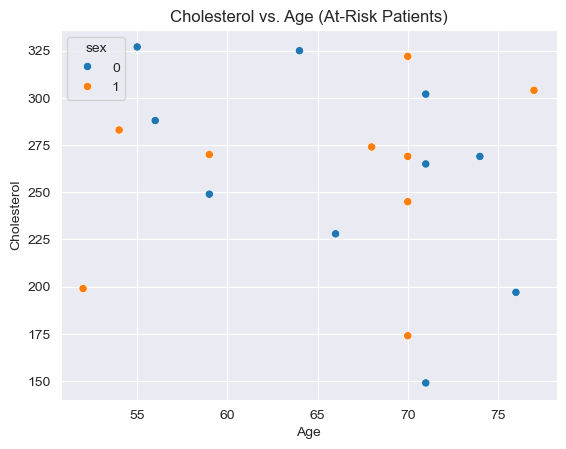

In [87]:
# complete the python code here
at_risk = heart_augmented[
    (heart_augmented["age"] >= 70) | (heart_augmented["trestbps"] > 170)
]

sns.scatterplot(data=at_risk, x="age", y="chol", hue="sex")

plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Cholesterol vs. Age (At-Risk Patients)")
plt.show()

### `.loc` and `.iloc`

We can use `.loc` to get, say, the first ten values of the age and resting blood pressure ("trestbps") columns:

In [88]:
heart_augmented.loc

In [89]:
heart_augmented.loc[:9, ['age', 'trestbps']]

,age,trestbps
0,63,145
1,37,130
2,41,130
3,56,120
4,57,120
5,57,140
6,56,140
7,44,120
8,52,172
9,57,150


`.iloc` is used for selecting locations in the DataFrame **by number**:

In [90]:
heart_augmented.iloc

In [91]:
heart_augmented.iloc[3, 0]

3.0

In [92]:
heart_augmented.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol_plus_trestbps
0,0.0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,378
1,1.0,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,380
2,2.0,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,334
3,3.0,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,356
4,4.0,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,474


### Exercise

How would we get the same slice as just above by using .iloc() instead of .loc()?

In [93]:
# complete the python code here

heart_augmented.iloc[0:10, [1, 4]]

,age,trestbps
0,63,145
1,37,130
2,41,130
3,56,120
4,57,120
5,57,140
6,56,140
7,44,120
8,52,172
9,57,150


## Statistics

### `.mean()`

In [94]:
# complete the python code here

# Calculate the mean of all numeric columns in heart_augmented
heart_augmented.mean()

id                    151.000000
age                    54.239344
sex                     0.681967
cp                      0.960656
trestbps              131.580328
chol                  246.091803
fbs                     0.147541
restecg                 0.527869
thalach               149.459016
exang                   0.327869
oldpeak                 1.036393
slope                   1.396721
ca                      0.727869
thal                    2.314754
target                  0.540984
test                    0.000000
chol_plus_trestbps    377.672131
dtype: float64

Be careful! Some of these will are not straightforwardly interpretable. What does an average "sex" of 0.682 mean?

### `.min()`

In [95]:
# complete the python code here

# Calculate the minimum value for all numeric columns in heart_augmented
min_values = heart_augmented.min()
print(min_values)

id                      0.0
age                    29.0
sex                     0.0
cp                      0.0
trestbps               94.0
chol                  126.0
fbs                     0.0
restecg                 0.0
thalach                71.0
exang                   0.0
oldpeak                 0.0
slope                   0.0
ca                      0.0
thal                    0.0
target                  0.0
test                    0.0
chol_plus_trestbps    249.0
dtype: float64


### `.max()`

In [96]:
# complete the python code here

# Calculate the maximum value for all numeric columns in heart_augmented
min_values = heart_augmented.max()
print(min_values)

id                    302.0
age                    77.0
sex                     1.0
cp                      3.0
trestbps              200.0
chol                  564.0
fbs                     1.0
restecg                 2.0
thalach               202.0
exang                   1.0
oldpeak                 6.2
slope                   2.0
ca                      4.0
thal                    3.0
target                  1.0
test                    0.0
chol_plus_trestbps    679.0
dtype: float64


## Series Methods

### `.value_counts()`

How many different values does slope have? What about sex? And target?

In [97]:
heart_augmented['slope'].value_counts()

slope
2    142
1    142
0     21
Name: count, dtype: int64

In [98]:
heart_augmented['sex'].value_counts()

sex
1    208
0     97
Name: count, dtype: int64

### `.sort_values()`

In [99]:
heart_augmented['age'].sort_values()

72     29
304    30
58     34
125    34
65     35
       ..
25     71
60     71
129    74
144    76
238    77
Name: age, Length: 305, dtype: int64

## `pandas`-Native Plotting

The `.plot()` and `.hist()` methods available for DataFrames use a wrapper around `matplotlib`:

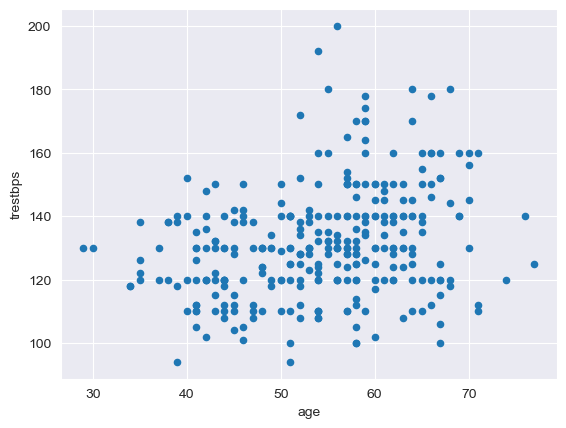

In [100]:
heart_augmented.plot(x='age', y='trestbps', kind='scatter');

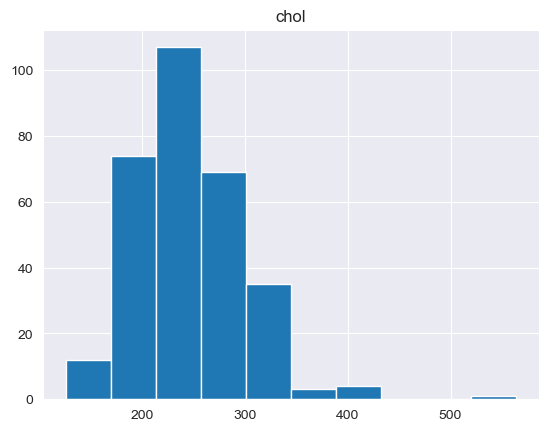

In [101]:
heart_augmented.hist(column='chol');

### Exercises

1. Make a bar plot of "age" vs. "slope" for the `heart_augmented` DataFrame.

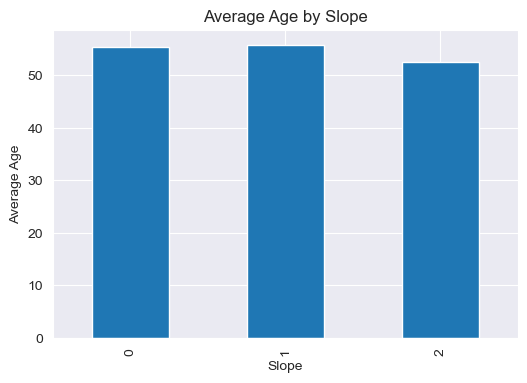

In [102]:
# complete the python code here

import matplotlib.pyplot as plt

# Group by 'slope' and compute the mean of 'age'
avg_age_by_slope = heart_augmented.groupby('slope')['age'].mean()

# Create a bar plot of average age by slope
avg_age_by_slope.plot(kind='bar', figsize=(6,4))

plt.xlabel("Slope")
plt.ylabel("Average Age")
plt.title("Average Age by Slope")
plt.show()

2. Make a histogram of ages for **just the men** in `heart_augmented` (heart_augmented['sex']=1).

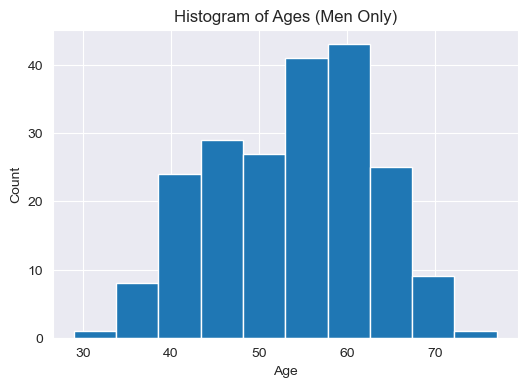

In [103]:
# complete the python code here

# Filter for men
men_df = heart_augmented[heart_augmented["sex"] == 1]

# Make a histogram of the 'age' column for men
men_df["age"].hist(bins=10, figsize=(6,4))

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Ages (Men Only)")
plt.show()

3. Make separate scatter plots of cholesterol vs. resting systolic blood pressure for the target=0 and the target=1 groups. Put both plots on the same figure and give each an appropriate title.

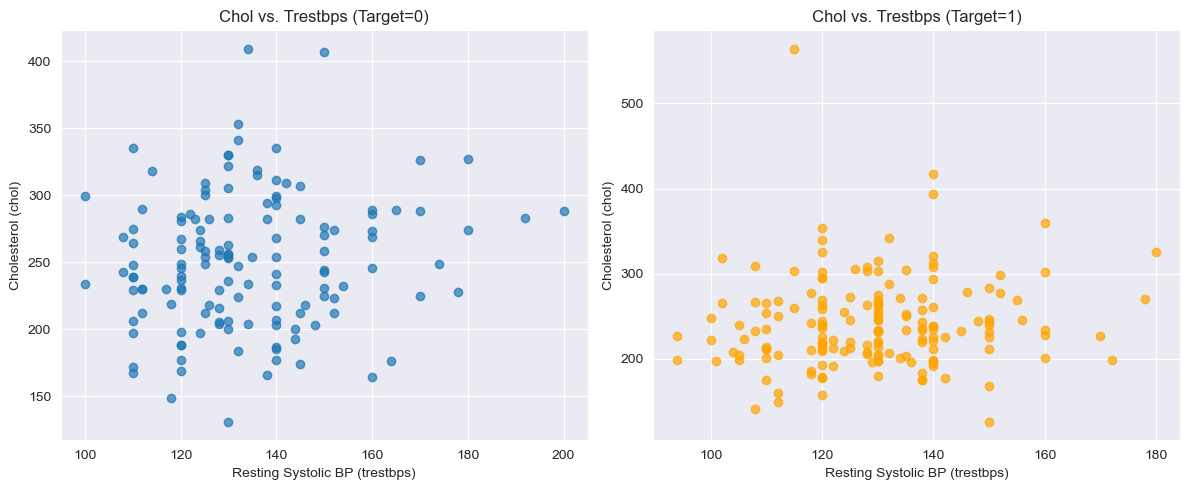

In [104]:
# complete the python code here

# Separate the DataFrame by target
target_0 = heart_augmented[heart_augmented["target"] == 0]
target_1 = heart_augmented[heart_augmented["target"] == 1]

# Create subplots: one row, two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot for target=0
axes[0].scatter(target_0["trestbps"], target_0["chol"], alpha=0.7)
axes[0].set_title("Chol vs. Trestbps (Target=0)")
axes[0].set_xlabel("Resting Systolic BP (trestbps)")
axes[0].set_ylabel("Cholesterol (chol)")

# Scatter plot for target=1
axes[1].scatter(target_1["trestbps"], target_1["chol"], alpha=0.7, color="orange")
axes[1].set_title("Chol vs. Trestbps (Target=1)")
axes[1].set_xlabel("Resting Systolic BP (trestbps)")
axes[1].set_ylabel("Cholesterol (chol)")

plt.tight_layout()
plt.show()

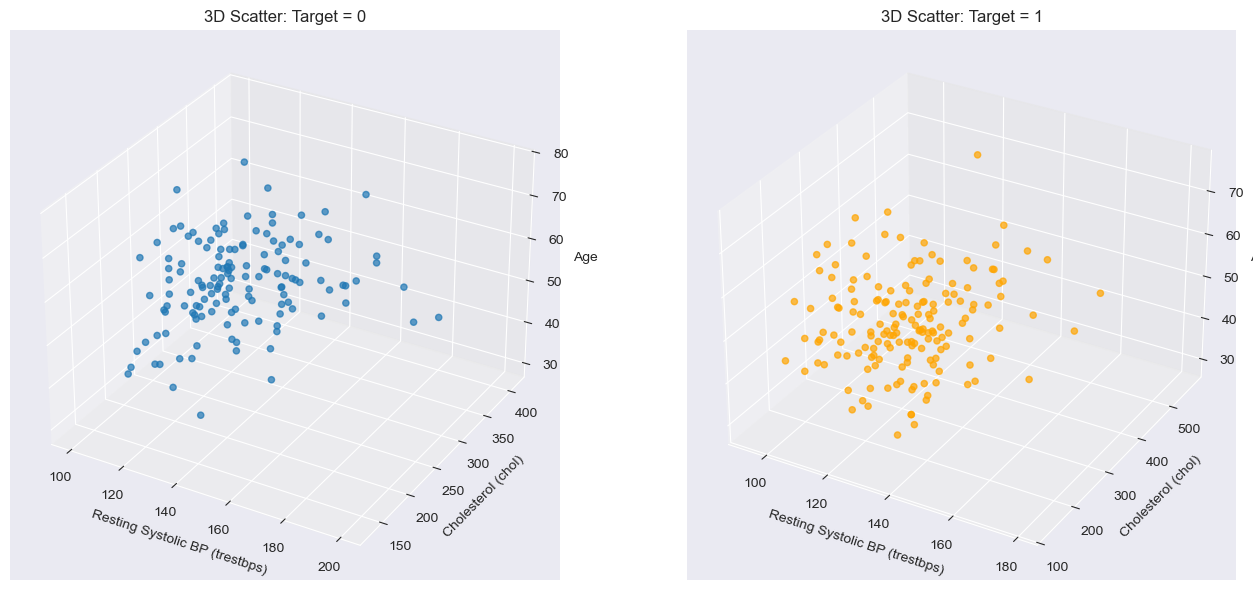

In [106]:
import matplotlib.pyplot as plt

# Needed for 3D plotting
from mpl_toolkits.mplot3d import Axes3D  

# Separate the data by target
target_0 = heart_augmented[heart_augmented["target"] == 0]
target_1 = heart_augmented[heart_augmented["target"] == 1]

# Create a figure with two subplots for 3D scatter plots
fig = plt.figure(figsize=(14, 6))

# 3D scatter plot for target=0
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(target_0["trestbps"], target_0["chol"], target_0["age"], alpha=0.7)
ax1.set_title("3D Scatter: Target = 0")
ax1.set_xlabel("Resting Systolic BP (trestbps)")
ax1.set_ylabel("Cholesterol (chol)")
ax1.set_zlabel("Age")

# 3D scatter plot for target=1
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(target_1["trestbps"], target_1["chol"], target_1["age"], alpha=0.7, color='orange')
ax2.set_title("3D Scatter: Target = 1")
ax2.set_xlabel("Resting Systolic BP (trestbps)")
ax2.set_ylabel("Cholesterol (chol)")
ax2.set_zlabel("Age")

plt.tight_layout()
plt.show()